# Análise Exploratória de Dados (EDA) — Marketing Digital

**Autor:** Guybson Lopes

Este notebook apresenta uma EDA completa e didática sobre um conjunto de dados de campanhas de marketing digital. A proposta é explicar cada etapa de forma clara e contextualizada, conectando dados, negócio e decisões.


## 1. Dissertação sobre o Problema

### Problema de negócio
Empresas de e-commerce e serviços digitais investem em diversos canais (Email, PPC, SEO, Social Media, Referral) e tipos de campanha (Awareness, Consideration, Conversion, Retention). O desafio é **alocar o orçamento de forma eficiente**, maximizando conversões com o menor custo possível e com alto engajamento dos usuários.

### Relevância
- **Para o negócio:** decisões de investimento em mídia impactam diretamente CAC/CPA, ROI e crescimento. Uma alocação incorreta pode gerar desperdício e reduzir competitividade.
- **Para a sociedade:** campanhas mais eficientes reduzem custos, melhoram a experiência do cliente e evitam excesso de anúncios irrelevantes.

### Como a análise de dados ajuda
A EDA permite:
- Identificar padrões de desempenho por canal e tipo de campanha.
- Detectar outliers e comportamentos atípicos.
- Apoiar decisões baseadas em evidências, como realocar verba ou ajustar estratégias.


## 2. Fontes de Dados

Os dados utilizados aqui são os mesmos do dashboard no Looker Studio. A fonte original é pública no Kaggle:

- **Kaggle:** https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset

### Descrição do dataset
- **Volume:** 8.000 registros
- **Principais variáveis:** demografia (Age, Gender, Income), canais (CampaignChannel), tipos de campanha (CampaignType), métricas de performance (AdSpend, CTR, ConversionRate), engajamento (WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks), histórico (PreviousPurchases, LoyaltyPoints) e target (Conversion).
- **Período:** não há coluna temporal no dataset.

**Justificativa do uso:** o conjunto de dados representa campanhas digitais com métricas reais de performance e engajamento, adequadas para analisar eficiência e conversão.

**Observação:** dados são públicos, não confidenciais e adequados para análises educacionais de marketing.


## 3. Análise Exploratória de Dados (EDA)

Nesta etapa vamos:
1. Carregar e inspecionar os dados.
2. Verificar tipos, valores nulos e duplicados.
3. Tratar dados e criar variáveis derivadas.
4. Analisar estatísticas descritivas e correlações.
5. Explorar padrões por canal e tipo de campanha.

**Observação:** a análise será feita em Python/pandas. Caso necessário, estas mesmas análises podem ser reproduzidas em SQL ou Planilhas.


### Exemplo de consultas em SQL (equivalentes)

```sql
-- Gasto e conversões por canal
SELECT CampaignChannel,
       SUM(AdSpend) AS total_spend,
       SUM(Conversion) AS total_conversions,
       AVG(ClickThroughRate) AS avg_ctr,
       AVG(ConversionRate) AS avg_cvr
FROM marketing
GROUP BY CampaignChannel
ORDER BY total_conversions DESC;

-- KPI geral
SELECT
  SUM(AdSpend) AS total_spend,
  SUM(Conversion) AS total_conversions,
  SUM(AdSpend) / NULLIF(SUM(Conversion),0) AS cpa,
  SUM(AdSpend) / NULLIF(SUM(WebsiteVisits),0) AS cpc
FROM marketing;
```


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
# Carregamento dos dados (CSV pt-BR)
file_path = "digital_marketing_campaign_dataset_ptbr.csv"

# sep=';' e decimal=',' pois o arquivo está em formato pt-BR

df = pd.read_csv(file_path, sep=';', decimal=',')

print(df.shape)
df.head()


(8000, 20)


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912.0,Social Media,Awareness,6497.87,0.04,0.09,0,2.40,7.40,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760.0,Email,Retention,3898.67,0.16,0.18,42,2.92,5.35,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456.0,PPC,Awareness,1546.43,0.28,0.08,2,8.22,13.79,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085.0,PPC,Conversion,539.53,0.14,0.09,47,4.54,14.69,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964.0,PPC,Conversion,1678.04,0.25,0.11,0,2.05,13.99,6,6,6,8,4345,IsConfid,ToolConfid,1


In [3]:
# Inspeção rápida

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   float64
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [4]:
# Verificação de nulos e duplicados

nulls = df.isnull().sum().sort_values(ascending=False)
duplicates = df.duplicated().sum()

nulls, duplicates


(CustomerID             0
 Age                    0
 AdvertisingTool        0
 AdvertisingPlatform    0
 LoyaltyPoints          0
 PreviousPurchases      0
 EmailClicks            0
 EmailOpens             0
 SocialShares           0
 TimeOnSite             0
 PagesPerVisit          0
 WebsiteVisits          0
 ConversionRate         0
 ClickThroughRate       0
 AdSpend                0
 CampaignType           0
 CampaignChannel        0
 Income                 0
 Gender                 0
 Conversion             0
 dtype: int64,
 np.int64(0))

**Interpretação:**
- Nulos e duplicados podem distorcer estatísticas e precisam ser avaliados.
- Se não existirem, já é um bom sinal de qualidade inicial.


In [5]:
# Tipos de dados

df.dtypes


CustomerID               int64
Age                      int64
Gender                  object
Income                 float64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

### Tratamento e consistência

Vamos garantir que as colunas numéricas estejam no formato correto e criar métricas derivadas úteis para análise de performance (CPA, CPC).


In [6]:
# Conversão de tipos (se necessário)

numeric_cols = [
    "Age", "Income", "AdSpend", "ClickThroughRate", "ConversionRate",
    "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares",
    "EmailOpens", "EmailClicks", "PreviousPurchases", "LoyaltyPoints", "Conversion"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Métricas derivadas

df["CPA"] = df["AdSpend"] / df["Conversion"].replace(0, np.nan)
df["CPC"] = df["AdSpend"] / df["WebsiteVisits"].replace(0, np.nan)

# Uma métrica simples de engajamento de site

df["SiteEngagement"] = df["PagesPerVisit"] * df["TimeOnSite"]

# Checar novamente nulos após transformações

df.isnull().sum().sort_values(ascending=False).head(10)


CPA                    988
CPC                    149
CustomerID               0
SocialShares             0
Conversion               0
AdvertisingTool          0
AdvertisingPlatform      0
LoyaltyPoints            0
PreviousPurchases        0
EmailClicks              0
dtype: int64

### Estatísticas descritivas

Vamos entender o comportamento geral das métricas numéricas.


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000
AdSpend,8000.0,5000.944856,2838.038185,100.050000,2523.217500,5013.440000,7407.987500,9997.910
ClickThroughRate,8000.0,0.154876,0.084196,0.010000,0.080000,0.150000,0.230000,0.300
ConversionRate,8000.0,0.104405,0.055011,0.010000,0.060000,0.100000,0.150000,0.200
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000
PagesPerVisit,8000.0,5.549275,2.607385,1.000000,3.300000,5.530000,7.840000,10.000
TimeOnSite,8000.0,7.727747,4.228255,0.500000,4.070000,7.680000,11.480000,15.000
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000


### Distribuições

Visualizar distribuições ajuda a entender assimetria, dispersão e possíveis outliers.


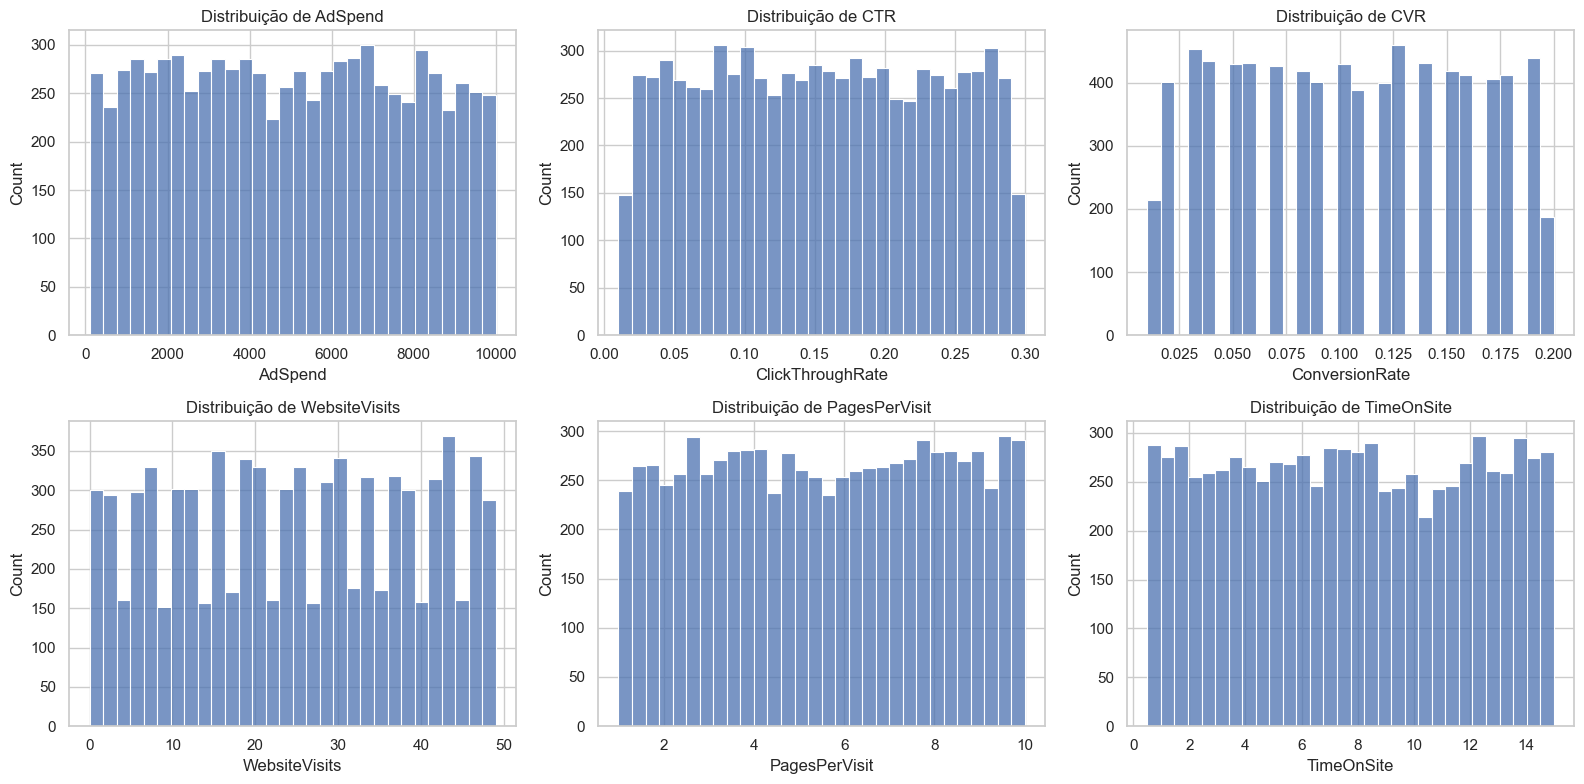

In [8]:
# Distribuição de métricas principais

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sns.histplot(df['AdSpend'], bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribuição de AdSpend')

sns.histplot(df['ClickThroughRate'], bins=30, ax=axes[0,1])
axes[0,1].set_title('Distribuição de CTR')

sns.histplot(df['ConversionRate'], bins=30, ax=axes[0,2])
axes[0,2].set_title('Distribuição de CVR')

sns.histplot(df['WebsiteVisits'], bins=30, ax=axes[1,0])
axes[1,0].set_title('Distribuição de WebsiteVisits')

sns.histplot(df['PagesPerVisit'], bins=30, ax=axes[1,1])
axes[1,1].set_title('Distribuição de PagesPerVisit')

sns.histplot(df['TimeOnSite'], bins=30, ax=axes[1,2])
axes[1,2].set_title('Distribuição de TimeOnSite')

plt.tight_layout()


### Outliers (IQR)

Outliers podem indicar casos extremos ou problemas de coleta. Vamos medir quantos valores estão além do intervalo interquartil em algumas métricas.


In [9]:
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

outlier_counts = {col: iqr_outliers(df[col].dropna()) for col in [
    'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite'
]}

outlier_counts


{'AdSpend': np.int64(0),
 'ClickThroughRate': np.int64(0),
 'ConversionRate': np.int64(0),
 'WebsiteVisits': np.int64(0),
 'PagesPerVisit': np.int64(0),
 'TimeOnSite': np.int64(0)}

### Análise por canal e tipo de campanha

Aqui buscamos entender **eficiência** (CPA, CPC), **volume** (gasto e conversão) e **taxas médias** (CTR, CVR).


In [10]:
# Por canal
by_channel = df.groupby('CampaignChannel').agg(
    AdSpend=('AdSpend','sum'),
    Conversions=('Conversion','sum'),
    CTR=('ClickThroughRate','mean'),
    CVR=('ConversionRate','mean'),
    WebsiteVisits=('WebsiteVisits','sum')
).reset_index()

by_channel['CPA'] = by_channel['AdSpend'] / by_channel['Conversions'].replace(0, np.nan)
by_channel['CPC'] = by_channel['AdSpend'] / by_channel['WebsiteVisits'].replace(0, np.nan)
by_channel['SpendShare'] = by_channel['AdSpend'] / by_channel['AdSpend'].sum()
by_channel['ConvShare'] = by_channel['Conversions'] / by_channel['Conversions'].sum()

by_channel.sort_values('Conversions', ascending=False)


,CampaignChannel,AdSpend,Conversions,CTR,CVR,WebsiteVisits,CPA,CPC,SpendShare,ConvShare
2,Referral,8653518.70,1518,0.151803,0.103037,42787,5700.605204,202.246446,0.216297,0.216486
1,PPC,8199237.06,1461,0.158363,0.104139,39977,5612.071910,205.098858,0.204942,0.208357
3,SEO,7740903.79,1359,0.153213,0.103626,38347,5696.029279,201.864651,0.193486,0.193811
0,Email,7871575.95,1355,0.155626,0.104843,38736,5809.281144,203.210862,0.196752,0.193240
4,Social Media,7542323.35,1319,0.155484,0.106590,38166,5718.213306,197.618911,0.188522,0.188106


In [11]:
# Por tipo de campanha
by_type = df.groupby('CampaignType').agg(
    AdSpend=('AdSpend','sum'),
    Conversions=('Conversion','sum'),
    CTR=('ClickThroughRate','mean'),
    CVR=('ConversionRate','mean'),
    WebsiteVisits=('WebsiteVisits','sum')
).reset_index()

by_type['CPA'] = by_type['AdSpend'] / by_type['Conversions'].replace(0, np.nan)
by_type['CPC'] = by_type['AdSpend'] / by_type['WebsiteVisits'].replace(0, np.nan)
by_type['SpendShare'] = by_type['AdSpend'] / by_type['AdSpend'].sum()
by_type['ConvShare'] = by_type['Conversions'] / by_type['Conversions'].sum()

by_type.sort_values('Conversions', ascending=False)


,CampaignType,AdSpend,Conversions,CTR,CVR,WebsiteVisits,CPA,CPC,SpendShare,ConvShare
2,Conversion,10300076.91,1939,0.155720,0.104896,50629,5312.056168,203.442235,0.257453,0.276526
0,Awareness,10077845.90,1701,0.155790,0.104341,49222,5924.659553,204.742715,0.251899,0.242584
1,Consideration,9861273.91,1701,0.151826,0.105131,50301,5797.339159,196.045286,0.246485,0.242584
3,Retention,9768362.13,1671,0.156158,0.103205,47861,5845.818151,204.098580,0.244163,0.238306


### Correlações

A correlação ajuda a identificar relações entre métricas, embora não implique causalidade.


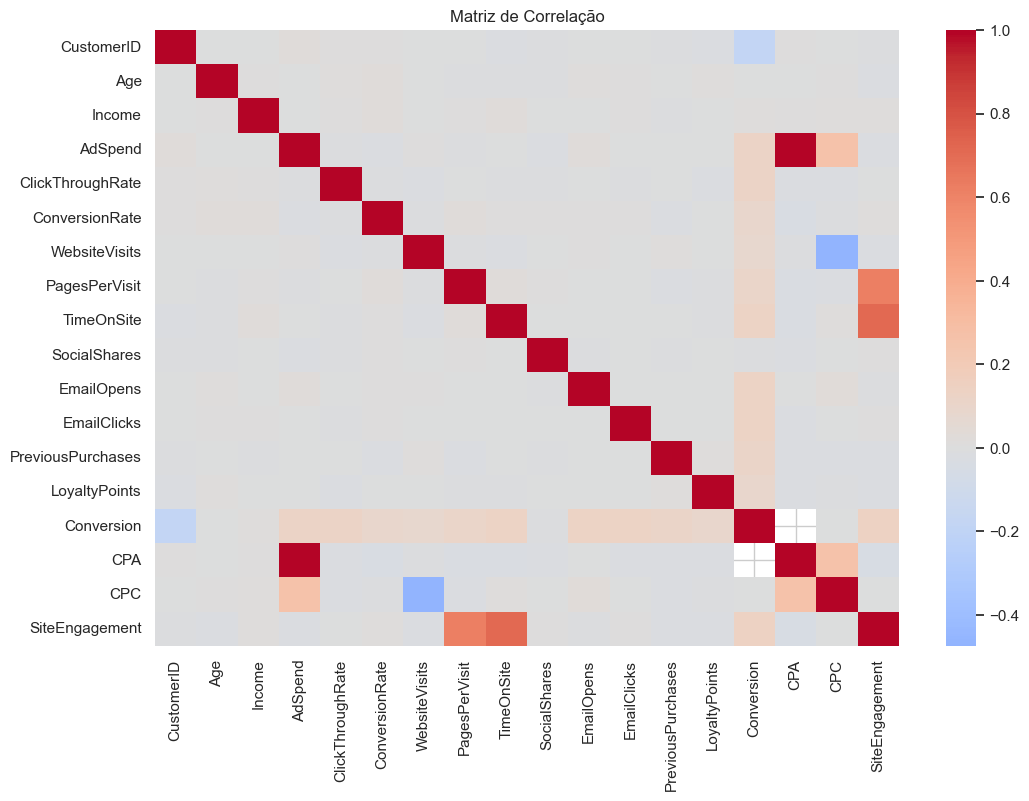

In [12]:
# Correlação numérica
num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()


### Conversão média por canal e tipo

A variável **Conversion** é binária. A média dela equivale à taxa de conversão.


In [13]:
# Conversão média por canal e tipo

conv_by_channel = df.groupby('CampaignChannel')['Conversion'].mean().sort_values(ascending=False)
conv_by_type = df.groupby('CampaignType')['Conversion'].mean().sort_values(ascending=False)

conv_by_channel, conv_by_type


(CampaignChannel
 Referral        0.883072
 PPC             0.882779
 SEO             0.876774
 Email           0.870263
 Social Media    0.868334
 Name: Conversion, dtype: float64,
 CampaignType
 Conversion       0.933558
 Retention        0.858243
 Awareness        0.855634
 Consideration    0.855634
 Name: Conversion, dtype: float64)

## 4. Relatório de Insights

Nesta seção conectamos achados quantitativos com decisões de negócio. Os resultados abaixo devem ser interpretados considerando que:
- Não há coluna temporal (logo, não há tendências ao longo do tempo).
- Não há receita (ROAS não pode ser calculado).


In [14]:
# KPIs gerais

kpis = {
    'Total Spend': df['AdSpend'].sum(),
    'Total Conversions': df['Conversion'].sum(),
    'Avg CTR': df['ClickThroughRate'].mean(),
    'Avg CVR': df['ConversionRate'].mean(),
    'CPA': df['AdSpend'].sum() / df['Conversion'].sum(),
    'CPC': df['AdSpend'].sum() / df['WebsiteVisits'].sum()
}

kpis


{'Total Spend': np.float64(40007558.85000001),
 'Total Conversions': np.int64(7012),
 'Avg CTR': np.float64(0.15487625000000002),
 'Avg CVR': np.float64(0.10440500000000001),
 'CPA': np.float64(5705.584547917856),
 'CPC': np.float64(202.04511244211244)}

### Principais Insights (com números)

- **Gasto total:** R$ 40,007,558.85 para **7,012** conversões (CPA médio **R$ 5,705.58**).
- **Eficiência por canal:** melhor CPA em **PPC** (R$ 5,612.07); pior CPA em **Email** (R$ 5,809.28).
- **Eficiência por tipo:** melhor CPA em **Conversion** (R$ 5,312.06); pior CPA em **Awareness** (R$ 5,924.66).
- **CTR médio:** 15.49% | **CVR médio:** 10.44%.
- **Share de conversões x gasto:** canais com gasto acima do retorno relativo: **Email** e **Social Media** (spend share > conversion share).

**Recomendações práticas:**
- Manter ou escalar campanhas do tipo **Conversion** (melhor CPA) e canal **PPC** (melhor CPA por canal).
- Revisar **Email** e **Social Media** para reduzir custo ou melhorar conversão, pois gastam proporcionalmente mais do que convertem.
- Investigar diferenças entre CTR e CVR para entender se o problema está em atração (CTR) ou em conversão (CVR).


## Conclusão

A análise exploratória mostra que é possível compreender eficiência, volume e engajamento das campanhas mesmo sem dados temporais. Os resultados orientam decisões como:
- Reforçar canais com melhor CPA e share de conversão.
- Otimizar canais com alto gasto e menor retorno relativo.
- Explorar tipos de campanha com conversão mais alta.

